In [1]:
from preprocess_training_data import preprocess_training_data

import tensorflow as tf
import numpy as np
from sklearn.decomposition import PCA
from sklearn import svm
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from readwav import read_wav_slices
import IPython.display as ipd


# Pitch recognition using an SVM

This notebook learns to recognize pitch using an SVM, trained with a melodica (for now pitches C4-B4). The resulting classifier can not only recognize notes from the melodica, but also from other instruments.

In [2]:
preprocess_training_data()
training_data = np.load('data/processed/data.npy')
rows = training_data.shape[0]
training_data = training_data/np.resize(np.mean(training_data,axis=1),(rows,1))
training_labels = np.load('data/processed/labels.npy')

/Users/danr6/dev/python/chords/preprocess_training_data.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, filedata = wav.read(notefile)


In [3]:
pca = PCA(n_components=15)
svc = svm.SVC(gamma='scale')
pca.fit(training_data)
svc.fit(pca.transform(training_data), training_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
predicted = svc.predict(pca.transform(training_data))
np.mean(predicted == training_labels)

1.0

## Test melody from a melodica

In [5]:
ipd.Audio(filename='test_audio/melodica1-web.wav', rate=44100)

/usr/local/anaconda3/envs/chords/lib/python3.7/site-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


(0, 12)

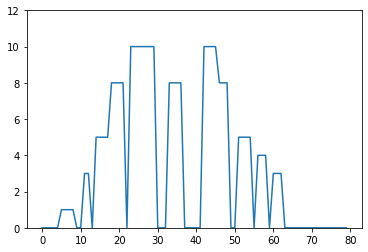

In [6]:
samplefreq = 44100
N = 8000

name, recording = wav.read('./test_audio/melodica1.wav')
data = np.vstack(list(read_wav_slices(N,0,recording)))
reduced = pca.transform(data)
prediction = svc.predict(reduced)
plt.plot(prediction)
plt.ylim(bottom=0, top=12)

Notes are numbered 0 to 12, with 0 being silence. This explains the constant drops between notes.

## Test melody from a violin

In [7]:
ipd.Audio(filename='test_audio/violin-web.wav', rate=44100)

/usr/local/anaconda3/envs/chords/lib/python3.7/site-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


(0, 12)

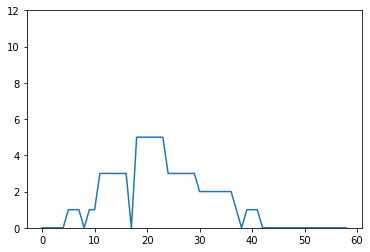

In [8]:
samplefreq = 44100
N = 8000

name, recording = wav.read('./test_audio/violin.wav')
data = np.vstack(list(read_wav_slices(N,0,recording)))
reduced = pca.transform(data)
prediction = svc.predict(reduced)
plt.plot(prediction)
plt.ylim(bottom=0, top=12)